In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, I will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. 

This model predicts whether a passenger will survive on the titanic or not.

In [93]:
# importing libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [95]:
# load the titanic dataset

df=pd.read_csv("Titanic.csv")

# EXAMINE THE DATA

In [96]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [97]:
# Print the first 10 rows of dataset

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [98]:
# Print the last 10 rows of datatset

df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [99]:
# Count the number of rows & columns in the data

df.shape

(891, 12)

In [100]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Attribute Information:

Survived: Outcome of survival (0 = No; 1 = Yes) ----> categorical feature

Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)-----> categorical feature

Name: Name of passenger-----> string/object

Sex: Sex of the passenger-----> categorical feature

Age: Age of the passenger (Some entries contain NaN)-------> continous feature

SibSp: Number of siblings and spouses of the passenger aboard------> categorical featute

Parch: Number of parents and children of the passenger aboard-------> categorical feature

Ticket: Ticket number of the passenger-----> object 

Fare: Fare paid by the passenger------> continous feature

Cabin Cabin number of the passenger (Some entries contain NaN)------>object

Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)----->categorical feature

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# DESCRIBING DATA

In [102]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The measures of central tendency and variability or distribution are some commonly used measures to define the data set. The measures used to define the central tendency are mean, median and mode. The standard deviations (or variance) are the minimum and maximum values of variables. The table above is a summary of some statistical measures for each numeric predictor of the dataset:

count indicates the number of records for each attribute that corresponds to the number of Survived.

mean indicates the average value around which each group of attributes is attested.

std indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

As we can see, the feature Sex, Name, Ticket, Cabin, Embarked is missing. This is because the values of these attributes are categorical or string and they do not have means and percentiles. A point to note here: ML models find it difficult to work with values of different types (such as both categorical and numeric, as is the case here) at the same time. This is why we will convert Sex, Embarked by LabelEncoding and drop "Name", "Cabin","Ticket" as these features are not contributing in our dataset predictions.



# Exploratory Data Analysis (EDA)

0    549
1    342
Name: Survived, dtype: int64

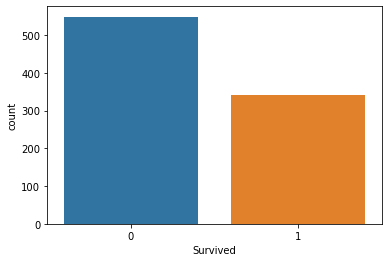

In [103]:
#Get the count of survived.

sns.countplot(x = 'Survived', data = df)
df["Survived"].value_counts()

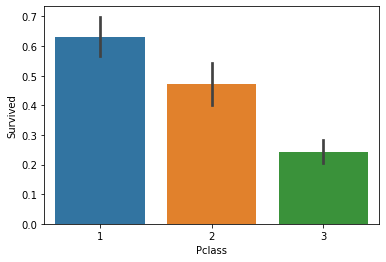

In [104]:
# PLot the survival rate of each class

sns.barplot(x="Pclass",y="Survived", data=df)


### Visualize the count of survivors for columns "sex", "pclass", "SibSp", "Parch", "Embarked"

male      577
female    314
Name: Sex, dtype: int64

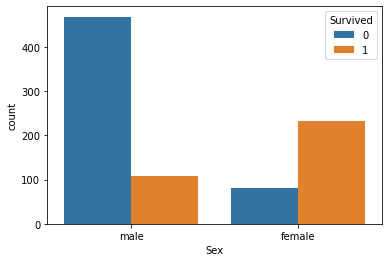

In [105]:
sns.countplot('Sex', data=df, hue='Survived')
df["Sex"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

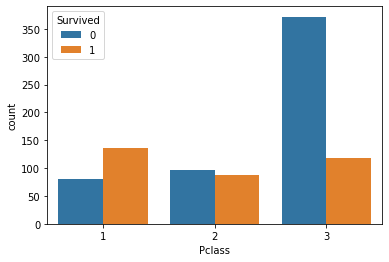

In [106]:
sns.countplot('Pclass', data=df, hue='Survived')
df["Pclass"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

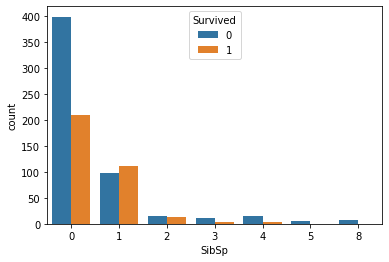

In [107]:
sns.countplot('SibSp', data=df, hue='Survived')
df["SibSp"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

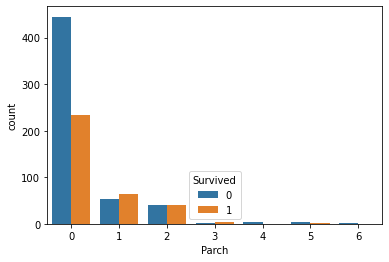

In [108]:
sns.countplot('Parch', data=df, hue='Survived')
df["Parch"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

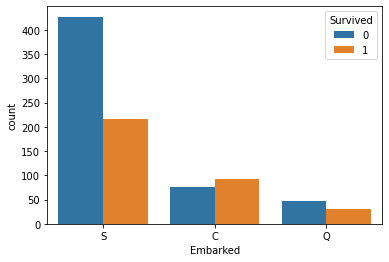

In [109]:
sns.countplot('Embarked', data=df, hue='Survived')
df["Embarked"].value_counts()

In [110]:
# compare survival rate across Age, SibSp, Parch, and Fare 

pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


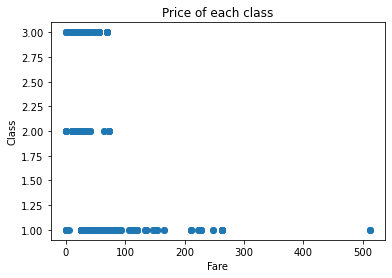

In [111]:
#Plot the prices paid by each class

plt.scatter (df["Fare"],df["Pclass"], label="Passenger paid")
plt.ylabel("Class")
plt.xlabel("Fare")
plt.title("Price of each class")

plt.show()

we can see that there is a huge difference in fare between classes.

1st class passenger paid large price than other two classes.

# DATA PREPROCESSING

In [112]:
# cleaning oou data

### CHECKING MISSING VALUES

In [113]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

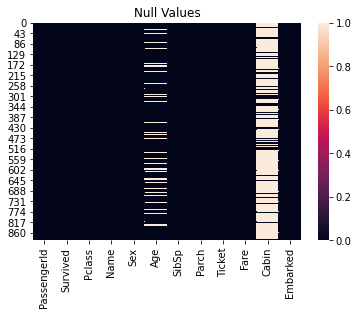

In [114]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

 we can see that there is missing values under "Age", "cabin", "Embarked"
 
 Now we will handle our missing values.

In [115]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Harmer, Mr. Abraham (David Lishin)       1
Rosblom, Mr. Viktor Richard              1
Gillespie, Mr. William Henry             1
Saundercock, Mr. William Henry           1
Meyer, Mrs. Edgar Joseph (Leila Saks)    1
                                        ..
Turpin, Mr. William John Robert          1
Pasic, Mr. Jakob                         1
Hickman, Mr. Stanley George              1
Kimball, Mr. Edwin Nelson Jr             1
van Melkebeke, Mr. Philemon              1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209


# Treating Missing Values

In [116]:
# Drop the column Cabin
df.drop(["Cabin","PassengerId","Name","Ticket"], axis=1,inplace=True)

we are droping "Cabin", "Name", "Ticket" as they have unique vales and are not contributing in our predictions.

In [117]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [118]:
# treating missing values of Age

In [119]:
df["Age"]=df["Age"].astype(float)

In [120]:
df["Age"]=df["Age"].fillna(np.mean(df["Age"]))

In [121]:
df.dropna(subset=['Embarked'],inplace = True)

we will drop the rows in which Embarked values is missing as there any only 2 missing values. It will not give impact to our predictions.

In [122]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [123]:
df.shape

(889, 8)

now the row count is 889 and columns are 8 only.

# ENCODING

In [124]:
#Print the unique values in the columns 

print(df["Sex"].unique())
print(df["Embarked"].unique())

['male' 'female']
['S' 'C' 'Q']


In [125]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [126]:
df["Embarked"] = le.fit_transform(df["Embarked"])

In [127]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


# FINDING CORRELATION

### Multivariate Analysis

In [128]:
corr= df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


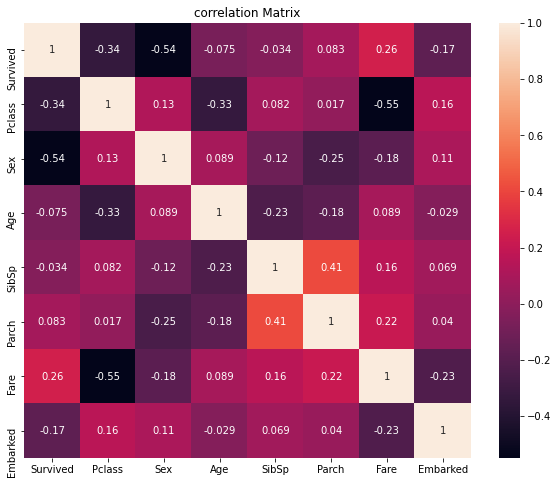

In [129]:
corr_mat=df.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [130]:
corr_matrix=df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.074673
Embarked   -0.169718
Pclass     -0.335549
Sex        -0.541585
Name: Survived, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

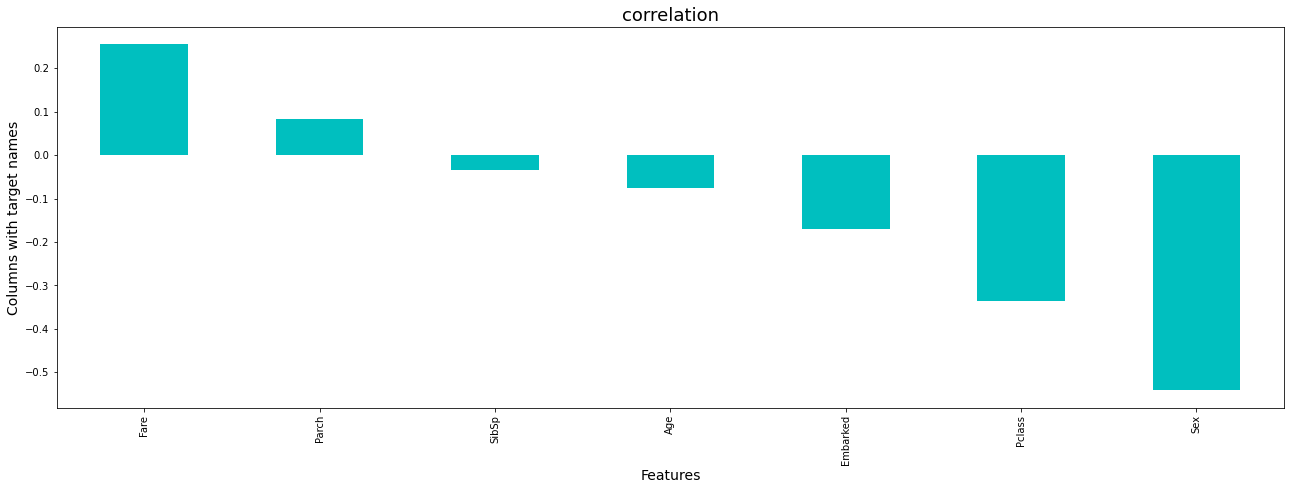

In [131]:
plt.figure(figsize=(22,7))
df.corr()["Survived"].sort_values(ascending=False).drop(["Survived"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

survivors has a negative relationship with Fare, Parch.

and Positive relationship with Emabrked, Pclass, Sex.

In [132]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


# Splitting the data into X & Y

In [133]:
x= df.drop("Survived",axis=1)     # independent variable
y= df["Survived"]                # dependent variable

In [134]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

# scaling 

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

Now every column value is between 0 & 1. We can compare the data more accurately.

In [136]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...
884,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
885,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
886,1.0,0.0,0.367921,0.125,0.333333,0.045771,1.0
887,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


# Checking outliers

In [137]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

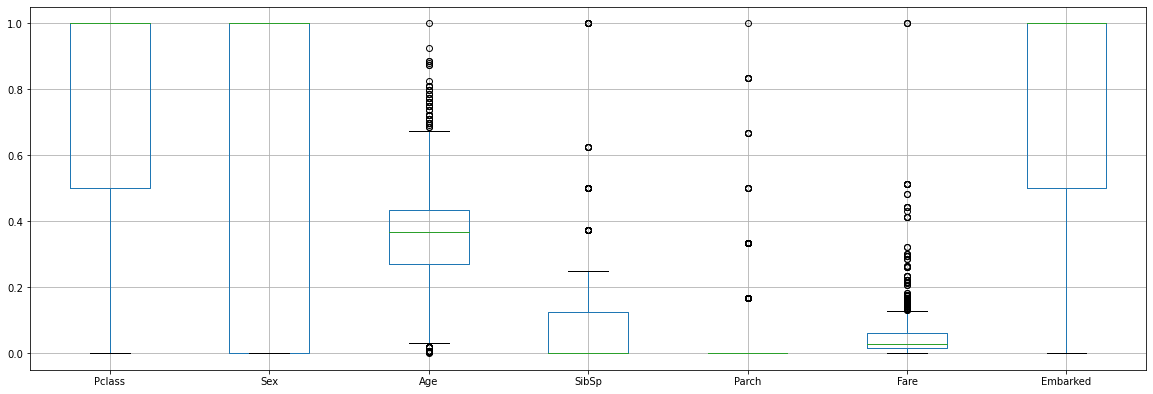

In [138]:
x.iloc[:,0:9].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

In [139]:
from scipy.stats import zscore
z= np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
        118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
        298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
        526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
        688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
        823, 844, 848, 849, 856, 861, 883], dtype=int64),
 array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
        5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
        4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
        3, 3, 2, 4, 3, 4], dtype=int64))

In [140]:
x_new_z=x[(z<3).all(axis=1)]
x_new_z

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...
884,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
885,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
886,1.0,0.0,0.367921,0.125,0.333333,0.045771,1.0
887,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


In [141]:
x_new_z.shape

(818, 7)

In [142]:
#percentage of data loss:

Data_loss=((889-818)/889)*100

In [143]:
Data_loss

7.986501687289089

Our data is becoming biased as it will loss 8% of original data.

That's why we will mot remove outliers.

# Checking Skweness

In [144]:
x.skew()

Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

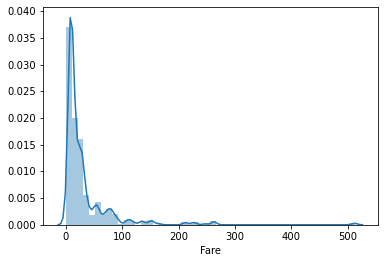

In [145]:
sns.distplot(df["Fare"])

In [146]:
x_new_z.skew()

Pclass     -0.639191
Sex        -0.671699
Age         0.311150
SibSp       1.975774
Parch       2.118544
Fare        2.342849
Embarked   -1.273629
dtype: float64

In [147]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# FINDING BEST RANDOM STATE

In [148]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.846441947565543 on Random_state 5


# CREATING TRAIN TEST SPLIT

### LogisticRegression

In [149]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(random_state=5)
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7378277153558053
[[127  36]
 [ 34  70]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       163
           1       0.66      0.67      0.67       104

    accuracy                           0.74       267
   macro avg       0.72      0.73      0.73       267
weighted avg       0.74      0.74      0.74       267



### DecisionTreeClassifier

In [150]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=5)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.7153558052434457
[[124  39]
 [ 37  67]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       163
           1       0.63      0.64      0.64       104

    accuracy                           0.72       267
   macro avg       0.70      0.70      0.70       267
weighted avg       0.72      0.72      0.72       267



### Support Vector Classifier

In [151]:
from sklearn.svm import SVC

svc= SVC(random_state=21)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7602996254681648
[[137  26]
 [ 38  66]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       163
           1       0.72      0.63      0.67       104

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



### RandomForestClassifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=21)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7415730337078652
[[130  33]
 [ 36  68]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       163
           1       0.67      0.65      0.66       104

    accuracy                           0.74       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.74      0.74      0.74       267



# cross_val_score

In [153]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score of LogisticRegression model:", scr.mean())

cross validation score of LogisticRegression model: 0.7930489430584651


In [154]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestClassifier model:", scr.mean())

cross validation score of RandomForestClassifier model: 0.8200533231765377


In [155]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("cross validation score of SVC model:", scr.mean())

cross validation score of SVC model: 0.8076620326287058


In [156]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model:", scr.mean())

cross validation score of DecisionTreeClassifier model: 0.7728369199517552


The minimum difference between accuracy_score & cross_val_score is with Support Vector Classifier algorithm. so, this SVC our best algorithm.

# Hyperparameter tunning with best model

In [157]:
# importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [158]:
from sklearn import svm, datasets

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()
GCV=GridSearchCV(svc, parameters, cv=5)
GCV.fit(x_train, y_train)
GCV.best_params_

{'C': 10, 'kernel': 'rbf'}

In [159]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [160]:
accuracy_score(y_test,GCV_pred)

0.7865168539325843

# AUC ROC CURVE

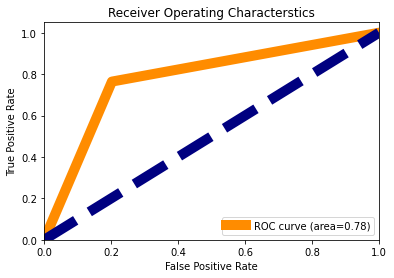

In [161]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(GCV_pred,y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="navy", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

# Model Saving

In [162]:
import joblib
joblib.dump(GCV.best_estimator_,"TitanicSVC.pkl")

['TitanicSVC.pkl']